# 8 Data Visualization

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


Data source: [CO2 emissions (kt) from World Bank](https://data.worldbank.org/indicator/EN.ATM.CO2E.KT)

In [241]:
df_co2_data = pd.read_csv("API_EN.ATM.CO2E.KT_DS2_en_csv_v2.csv", skiprows=4)
df_co2_data = df_co2_data.set_index('Country Code').drop(['Indicator Name', 'Indicator Code', '2015', '2016', 'Unnamed: 61'], axis=1)
df_co2_data.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2720.914,2717.247,2823.590,2658.575,2629.239,2508.228,2500.894,1349.456,861.745,872.746
AFG,Afghanistan,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,1224.778,...,1327.454,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,10014.577,9809.225
AGO,Angola,550.050,454.708,1180.774,1151.438,1224.778,1188.108,1554.808,993.757,1672.152,...,19156.408,22266.024,25151.953,25709.337,27792.193,29057.308,30340.758,33399.036,32617.965,34763.160
ALB,Albania,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,3072.946,...,4253.720,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4910.113,5064.127,5716.853
AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,575.719,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.710,462.042


In [242]:
df_all_regions = pd.read_csv("Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2.csv")
df_all_regions = df_all_regions.set_index('Country Code').drop(['SpecialNotes', 'Unnamed: 5'], axis=1)
df_all_regions.head(10)

,Region,IncomeGroup,TableName
Country Code,,,
ABW,Latin America & Caribbean,High income,Aruba
AFG,South Asia,Low income,Afghanistan
AGO,Sub-Saharan Africa,Lower middle income,Angola
ALB,Europe & Central Asia,Upper middle income,Albania
AND,Europe & Central Asia,High income,Andorra
ARB,NaN,NaN,Arab World
ARE,Middle East & North Africa,High income,United Arab Emirates
ARG,Latin America & Caribbean,Upper middle income,Argentina
ARM,Europe & Central Asia,Lower middle income,Armenia


In [243]:
country_codes = df_all_regions.dropna().index

Pre-defined styles provided by matplotlib

In [244]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [245]:
plt.style.use('fivethirtyeight')

## Line Plot
### Single Line Plot

In [246]:
df_wide = df_co2_data.loc[['WLD', 'CHN', 'USA'], df_co2_data.columns[1:]].T
df_wide = df_wide.rename_axis('Year').reset_index().rename_axis('', axis=1)
df_wide.head()

,Year,WLD,CHN,USA
0,1960,9.396706e+06,780726.302,2890696.100
1,1961,9.434403e+06,552066.850,2880505.507
2,1962,9.818840e+06,440359.029,2987207.873
3,1963,1.035575e+07,436695.696,3119230.874
4,1964,1.094701e+07,436923.050,3255995.306


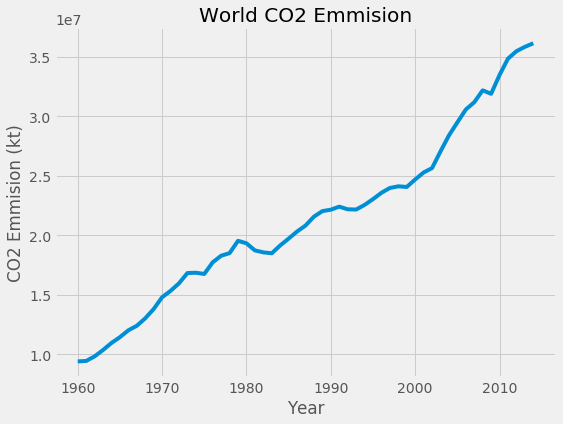

In [337]:
x = df_wide['Year']
y = df_wide['WLD']
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('CO2 Emmision (kt)')
plt.title('World CO2 Emmision')

### Multiple Lines Plot
#### Wide Format Data

In [248]:
df_wide.head()

,Year,WLD,CHN,USA
0,1960,9.396706e+06,780726.302,2890696.100
1,1961,9.434403e+06,552066.850,2880505.507
2,1962,9.818840e+06,440359.029,2987207.873
3,1963,1.035575e+07,436695.696,3119230.874
4,1964,1.094701e+07,436923.050,3255995.306


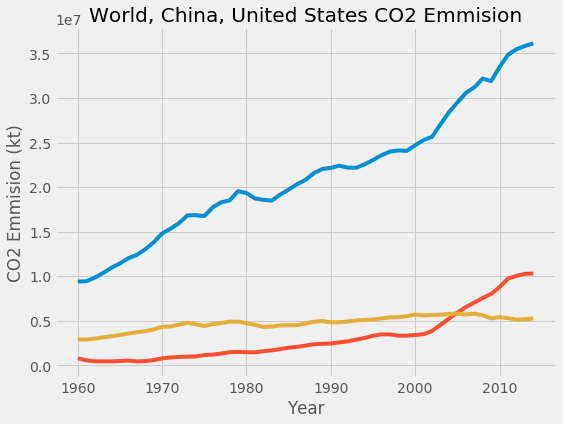

In [275]:
x = df_wide['Year']
y1 = df_wide['WLD']
y2 = df_wide['CHN']
y3 = df_wide['USA']
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xlabel('Year')
plt.ylabel('CO2 Emmision (kt)')
plt.title('World, China, United States CO2 Emmision')

#### Long Format Data

In [250]:
df_long = df_co2_data.loc[['WLD', 'CHN', 'USA'], df_co2_data.columns[1:]].T
df_long = df_long.unstack().reset_index().rename(columns={'level_1': 'Year', 0: 'CO2'})
df_long.head()

,Country Code,Year,CO2
0,WLD,1960,9.396706e+06
1,WLD,1961,9.434403e+06
2,WLD,1962,9.818840e+06
3,WLD,1963,1.035575e+07
4,WLD,1964,1.094701e+07


In [251]:
# Pivot long format data to wide format data
df_pivoted = df_long.pivot(index='Year', columns='Country Code', values='CO2').reset_index()
df_pivoted.head()

Country Code,Year,CHN,USA,WLD
0,1960,780726.302,2890696.100,9.396706e+06
1,1961,552066.850,2880505.507,9.434403e+06
2,1962,440359.029,2987207.873,9.818840e+06
3,1963,436695.696,3119230.874,1.035575e+07
4,1964,436923.050,3255995.306,1.094701e+07


## Vertical bar plot

In [252]:
df_top5 = df_co2_data.loc[country_codes, ['Country Name', '2014']].sort_values(by='2014', ascending=False).iloc[:5]
df_top5

,Country Name,2014
Country Code,,
CHN,China,1.029193e+07
USA,United States,5.254279e+06
IND,India,2.238377e+06
RUS,Russian Federation,1.705346e+06
JPN,Japan,1.214048e+06


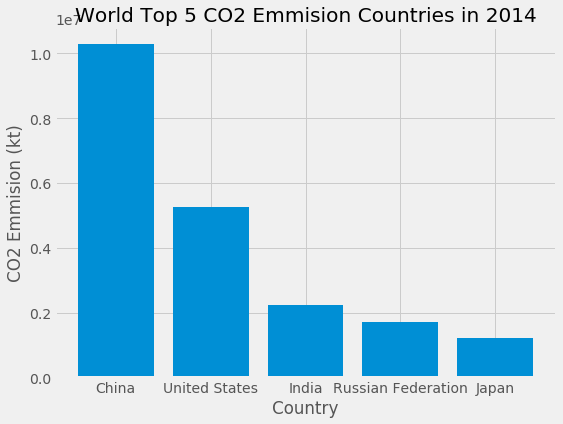

In [253]:
x = np.arange(len(df_top5['Country Name']))
y = df_top5['2014']
plt.bar(x, y)
plt.xticks(x, df_top5['Country Name'])
plt.xlabel('Country')
plt.ylabel('CO2 Emmision (kt)')
plt.title('World Top 5 CO2 Emmision Countries in 2014')

## Horizontal Bar Plot

In [254]:
df_top10 = df_co2_data.loc[country_codes, ['Country Name', '2014']].sort_values(by='2014', na_position='first')[-10:]
df_top10

,Country Name,2014
Country Code,,
CAN,Canada,5.371935e+05
KOR,"Korea, Rep.",5.871564e+05
SAU,Saudi Arabia,6.010470e+05
IRN,"Iran, Islamic Rep.",6.494807e+05
DEU,Germany,7.198834e+05
JPN,Japan,1.214048e+06
RUS,Russian Federation,1.705346e+06
IND,India,2.238377e+06
USA,United States,5.254279e+06


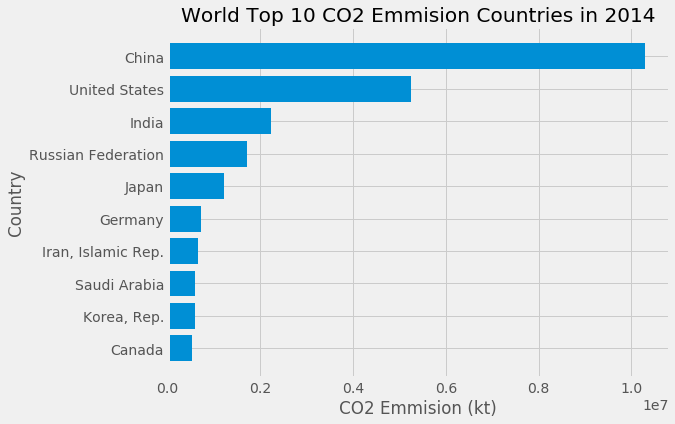

In [255]:
x = np.arange(len(df_top10['Country Name']))
y = df_top10['2014']
plt.barh(x, y)
plt.yticks(x, df_top10['Country Name'])
plt.xlabel('CO2 Emmision (kt)')
plt.ylabel('Country')
plt.title('World Top 10 CO2 Emmision Countries in 2014')

## Histogram

In [256]:
df_all = df_co2_data.loc[country_codes, ['Country Name', '2014']].sort_values(by='2014', ascending=False).dropna()
df_all.head()

,Country Name,2014
Country Code,,
CHN,China,1.029193e+07
USA,United States,5.254279e+06
IND,India,2.238377e+06
RUS,Russian Federation,1.705346e+06
JPN,Japan,1.214048e+06


In [257]:
df_all.tail()

,Country Name,2014
Country Code,,
MHL,Marshall Islands,102.676
KIR,Kiribati,62.339
NRU,Nauru,47.671
LIE,Liechtenstein,44.004
TUV,Tuvalu,11.001


In [258]:
df_all_log = df_all.copy()
df_all_log['2014'] = log10(df_all_log['2014'])
df_all_log.head()

,Country Name,2014
Country Code,,
CHN,China,7.012497
USA,United States,6.720513
IND,India,6.349933
RUS,Russian Federation,6.231812
JPN,Japan,6.084236


In [259]:
df_all_log.tail()

,Country Name,2014
Country Code,,
MHL,Marshall Islands,2.011469
KIR,Kiribati,1.794760
NRU,Nauru,1.678254
LIE,Liechtenstein,1.643492
TUV,Tuvalu,1.041432


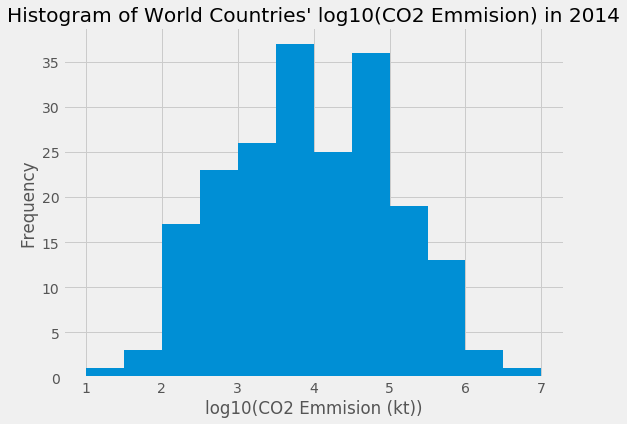

In [260]:
x = df_all_log['2014']
bins = np.linspace(1, 7, 13)
plt.hist(x, bins)
plt.xlabel('log10(CO2 Emmision (kt))')
plt.ylabel('Frequency')
plt.title('Histogram of World Countries\' log10(CO2 Emmision) in 2014')

## Boxplot

In [261]:
df_all.head()

,Country Name,2014
Country Code,,
CHN,China,1.029193e+07
USA,United States,5.254279e+06
IND,India,2.238377e+06
RUS,Russian Federation,1.705346e+06
JPN,Japan,1.214048e+06


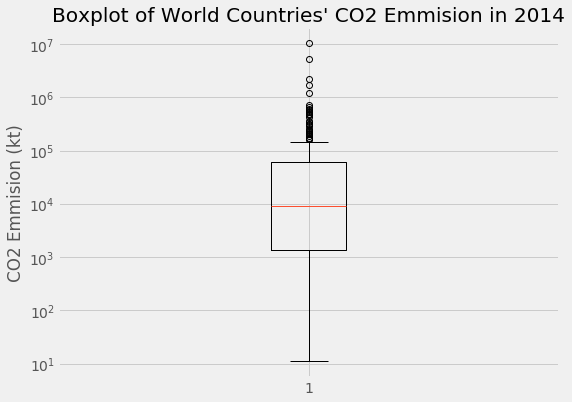

In [262]:
x = df_all['2014']
plt.boxplot(x)
plt.yscale('log')
plt.ylabel('CO2 Emmision (kt)')
plt.title('Boxplot of World Countries\' CO2 Emmision in 2014')

In [263]:
df_with_income = pd.concat([df_co2_data, df_all_regions], axis=1).loc[country_codes, ['Country Name', '2014', 'IncomeGroup']]
df_with_income.head()

,Country Name,2014,IncomeGroup
Country Code,,,
ABW,Aruba,872.746,High income
AFG,Afghanistan,9809.225,Low income
AGO,Angola,34763.160,Lower middle income
ALB,Albania,5716.853,Upper middle income
AND,Andorra,462.042,High income


In [264]:
df_by_income = df_with_income.groupby('IncomeGroup')['2014'].apply(pd.Series.reset_index, drop=True).unstack()
df_by_income.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
High income,872.746,462.042,211369.547,531.715,361261.839,58712.337,93350.819,31338.182,2416.553,575.719,...,12812.498,43420.947,733.4,495.045,205.352,46273.873,6747.28,5254279.285,179.683,NaN
Low income,9809.225,440.040,6318.241,2849.259,300.694,4671.758,154.014,696.730,11598.721,2449.556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lower middle income,34763.160,5529.836,73189.653,20410.522,1001.091,11045.004,7003.970,3094.948,491.378,722.399,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Upper middle income,5716.853,204024.546,NaN,37487.741,42416.189,22233.021,63497.772,495.045,529808.160,7033.306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


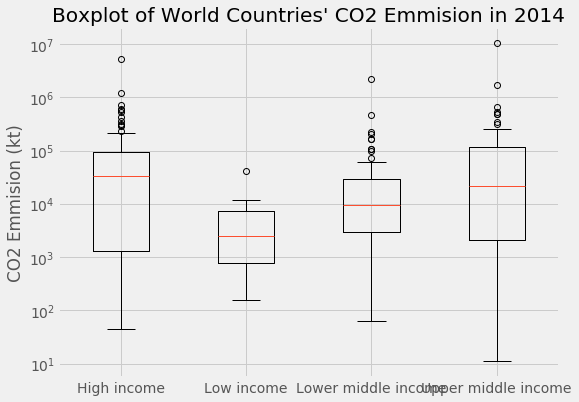

In [265]:
xs = [x[~np.isnan(x)] for x in df_by_income.values]
plt.boxplot(xs)
plt.xticks(arange(1, len(xs)+1), df_by_income.index)
plt.yscale('log')
plt.ylabel('CO2 Emmision (kt)')
plt.title('Boxplot of World Countries\' CO2 Emmision in 2014')

## Pie Chart

In [268]:
china = df_co2_data.loc['CHN', '2014']
rest = df_co2_data.loc['WLD', '2014'] - china
[china, rest]

[10291926.877999999, 25846358.122000001]

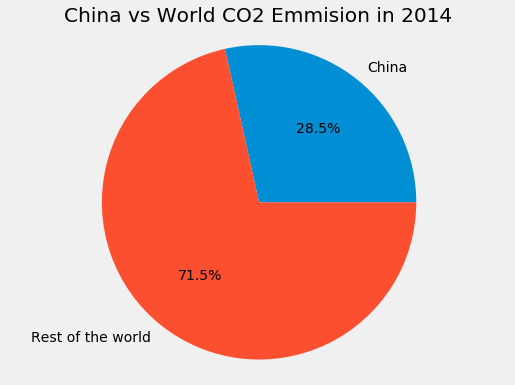

In [270]:
x = [china, rest]
labels = ['China', 'Rest of the world']
plt.pie(x, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('China vs World CO2 Emmision in 2014')

## Area Plot

In [273]:
df_wide_2 = df_wide.copy()
df_wide_2['Rest'] = df_wide_2['WLD'] - df_wide_2['CHN'] - df_wide_2['USA']
df_wide_2.head()

,Year,WLD,CHN,USA,Rest
0,1960,9.396706e+06,780726.302,2890696.100,5725283.433
1,1961,9.434403e+06,552066.850,2880505.507,6001830.238
2,1962,9.818840e+06,440359.029,2987207.873,6391272.972
3,1963,1.035575e+07,436695.696,3119230.874,6799820.776
4,1964,1.094701e+07,436923.050,3255995.306,7254088.736


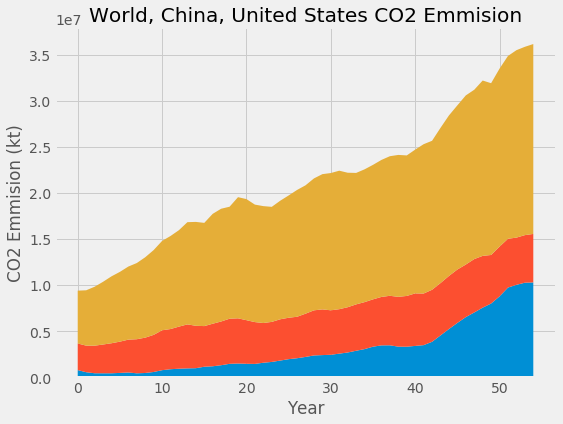

In [344]:
x = df_wide_2['Year'].astype(int)
y = df_wide_2[['CHN', 'USA', 'Rest']].T
plt.stackplot(arange(x.size), y)
plt.xlabel('Year')
plt.ylabel('CO2 Emmision (kt)')
plt.title('World, China, United States CO2 Emmision')

## Scatter Plot

In [342]:
df_compare = df_co2_data.loc[country_codes, ['Country Name', '2000', '2014']]
df_compare.head()

,Country Name,2000,2014
Country Code,,,
ABW,Aruba,2379.883,872.746
AFG,Afghanistan,773.737,9809.225
AGO,Angola,9541.534,34763.160
ALB,Albania,3021.608,5716.853
AND,Andorra,524.381,462.042


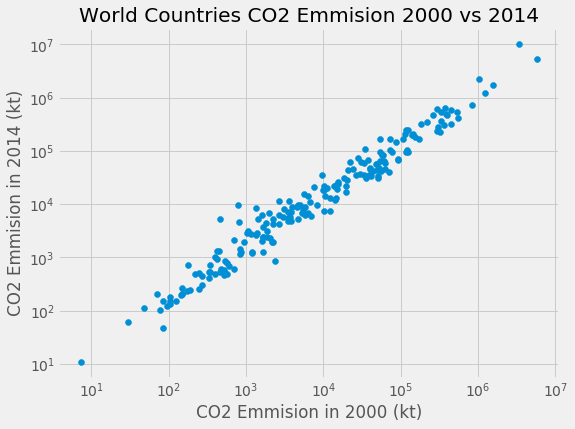

In [348]:
x = df_compare['2000']
y = df_compare['2014']
plt.scatter(x, y)
plt.xscale('log')
plt.yscale('log')
plt.title('World Countries CO2 Emmision 2000 vs 2014')
plt.xlabel('CO2 Emmision in 2000 (kt)')
plt.ylabel('CO2 Emmision in 2014 (kt)')

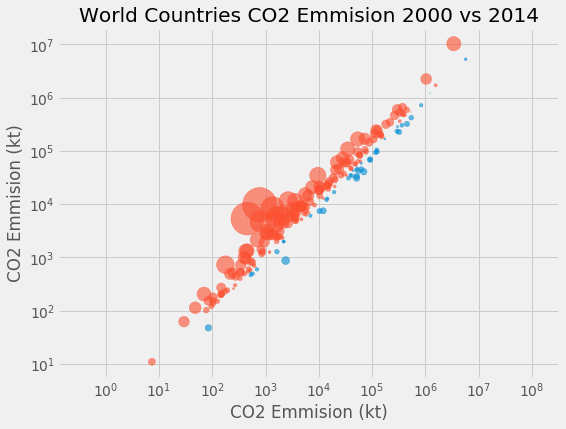

In [394]:
import matplotlib

x = df_compare['2000']
y = df_compare['2014']

# Color
color = numpy.where(x<y, '#FC4F30', '#028DD3')
# Size
size = abs(y - x) / x * 100

plt.scatter(x, y, c=color, s=size, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')
plt.title('World Countries CO2 Emmision 2000 vs 2014')
plt.xlabel('CO2 Emmision (kt)')
plt.ylabel('CO2 Emmision (kt)')